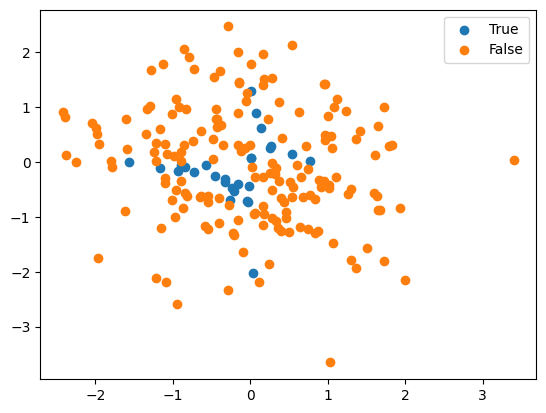

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def y_activate(x_1,x_2):
    if x_1 * x_2 >= 0:
        return 1
    else:
        return -1

def sign(x_1):
    if x_1 > 0:
        return 1
    else:
        return -1
 

X = np.random.randn(200,2)
A = np.zeros([200,6])
y = np.array([y_activate(X[i,0],X[i,1]) for i in range(len(X))])
for i in range(len(X)):
    x = X[i]
    x_1,x_2 = x[0],x[1]
    A[i,:] = np.array([1,x_1,x_2,x_1**2,x_1*x_2,x_2**2])

opt_theta = np.linalg.lstsq(A,y,rcond = None)[0]
y_spl = A@opt_theta
ind_x = []
ind_y = []
ind = []
for i in range(len(X)):
    if sign(y_spl[i]) != y[i]:
        ind_x.append(X[i,0])
        ind_y.append(X[i,1])
        ind.append(i)

not_ind_x = []
not_ind_y = []
for j in range(len(X)):
    if j not in set(ind):
        not_ind_x.append(X[j,0])
        not_ind_y.append(X[j,1])

plt.scatter(ind_x,ind_y,label = "True")
plt.scatter(not_ind_x,not_ind_y,label = "False")
plt.legend()
plt.show()